# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(x) = \arg\min_{y \in C} \|x-y\|^2,
\end{equation*}
где $C = \{x ~|~ \|x\|_1 \leq 1 \}$.

__(а)__ Найдите выражение для такой проекции в явном виде.

####  Рассмотрим $\arg\underset{||y||_1\leq 1}{min}\frac{1}{2} ||x - y||^2$.
#### Запишем Лагранжиан: $\mathcal L(y, \lambda) = \frac{1}{2} ||x - y||^2 + \lambda(||y||_1 - 1)$. 
#### Тогда $\mathcal L(y, \lambda) = \sum\limits_{i = 1}^n (\frac{1}{2}(x_i - y_i)^2 + \lambda|y_i|) - \lambda$, где $l_i(y_i, \lambda) = \frac{1}{2}(x_i - y_i)^2 + \lambda|y_i|$. $\quad\partial_y l_i = 0\Rightarrow x_i = y_i + \lambda\cdot sign(y_i)$.
#### Тогда $y_i = sign(x_i)\cdot\max(|x_i| - \lambda, 0)$
#### Итого: если точка $x\in C$ (случай $\lambda = 0$), то $proj_C (x) = x$, если $x\notin C$(случай $\lambda > 0$), то $proj_C (x_i) = sign(x_i)\cdot\max(|x_i| - \lambda, 0)$, где $\lambda$ - корень следующего уравнения: $\sum\limits_{i = 1}^n \max(|x_i| - \lambda, 0) = 1$
#### Существует более точный алгоритм нахождения проекции, а именно числа $\lambda$. Приведем его:
1) x - n-мерный вектор. Добавим нулевую компоненту равную нулю и отсортируем по возрастанию компоненты вектора.

2) Для i-ой компоненты найдем функцию $g' = (i - n)|x_i| + \sum\limits_{k = i + 1}^{n} |x_k| - 1$.

3) Найдем $ksign$ на котором $g'_{ksign} \geq 0, g'_{ksign+1}\leq 0$.

4) Тогда искомое $\lambda = \frac{(\sum\limits_{j = ksign + 1}^n |x_j|) - 1}{n - ksign}$

__(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

$prox_{\lambda\mathcal I_C} (x) = \arg\underset{y\in\mathcal R^d}{min} (\frac{1}{2} ||x - y||^2 + \lambda\mathcal I_C) = \arg\underset{y\in C}{min} ||x - y||^2 = proj_C (x)$


## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

__(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

$\frac{1}{n}\sum\limits_{i = 1}^{n} l(\omega^Т x_i, y_i)=  \frac{1}{n}||X\omega - y||^2$
#### Тогда задача минимизации: $\underset{\omega\in\mathcal R^d}{min}\frac{1}{n}||X\omega - y||^2$

__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [1]:
import numpy as np
from numpy import linalg
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import math
import pandas as pd
from datetime import datetime
from scipy.spatial import distance
import re
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import ortho_group
m = ortho_group.rvs(dim=3)
from sklearn import ensemble, model_selection, metrics, tree
%matplotlib inline
from sklearn.datasets import load_digits
import time

In [2]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же директории, что и notebook

In [3]:
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
print(n, d)

8124 112


Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
n_train, d_train = X_train.shape
n_test, d_test = X_test.shape
print(n_train, d_train)
print(n_test, d_test)
print(y_train.shape)
print(y_test.shape)

6499 112
1625 112
(6499,)
(1625,)


__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

#### Оценим константу Липшица аналитически. Для начала рассчитаем $\nabla(||X\omega - y||^2).\\$
$d (||X\omega - y||^2) = d<X\omega - y, X\omega - y> = 2<X\omega - y, Xd\omega> = <2X^Т(X\omega - y), d\omega>\Rightarrow \nabla(||X\omega - y||^2) = 2X^Т(X\omega - y).$

#### Из определения Липшицева градиента с константой L получаем: $||2X^ТX(\omega_1 - \omega_0)||\leq||2X^ТX||\cdot||\omega_1 - \omega_0||\Rightarrow L\geq||2X^ТX||$
#### Рассчитаем $\nabla^2(||X\omega - y||^2)$. Обозначим $d\omega$, как $d\omega_1$, тогда $d^2(||X\omega - y||^2) = <2X^ТXd\omega_2, d\omega_1>\Rightarrow\nabla^2(||X\omega - y||^2) = 2X^ТX$
#### Из критерия выпуклости: $\frac{1}{n}2X^ТX\geq 0$
#### Из критерия сильной выпуклости: $\frac{1}{n}2X^ТX\geq \mu I$
#### Из теории $X^TX$ - положительно определенная матрица, тогда наша задача выпуклая

In [5]:
print("L =", max(np.linalg.eigvals(1/n_train*X_train.T.dot(X_train))))
print("mu =", min(np.linalg.eigvals(1/n_train*X_train.T.dot(X_train))))

L = (10.338555451489233+0j)
mu = (-1.9373731772762486e-16+0j)


#### $mu$ очень мало, можно считать, что $mu\approx 0$




__(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

In [6]:
def func(X, y, omega):
    return 1/n_train*(X.dot(omega) - y).dot(X.dot(omega) - y)
def gradient(X, y, omega):
    return (2/n_train*X.T).dot(X.dot(omega) - y)


def gradient_descent(X, y, start, learning_rate, amount_of_iterations):
    omega = start
    omega = omega.reshape(1, d_train)
    for i in range (1, amount_of_iterations):
        omega = np.vstack([omega, omega[i-1] - learning_rate*gradient(X, y, omega[i-1])])
    return omega
res1 = gradient_descent(X_train, y_train, np.ones(d_train), 0.01, 10000)

In [7]:
omega_true = np.linalg.pinv(X_train) @ y_train
print("Критерий через функции:", func(X_train, y_train, res1[9999]) - func(X_train, y_train, omega_true))
print("Критерий через близость градиента к нулю", gradient(X_train, y_train, res1[9999]).dot(gradient(X_train, y_train, res1[9999])))

Критерий через функции: 0.0072825950767469744
Критерий через близость градиента к нулю 7.804846769804562e-05


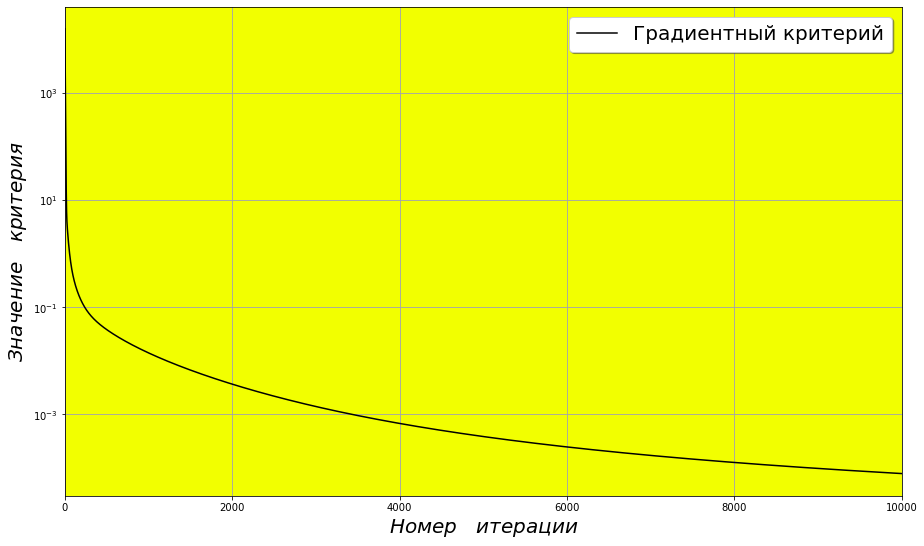

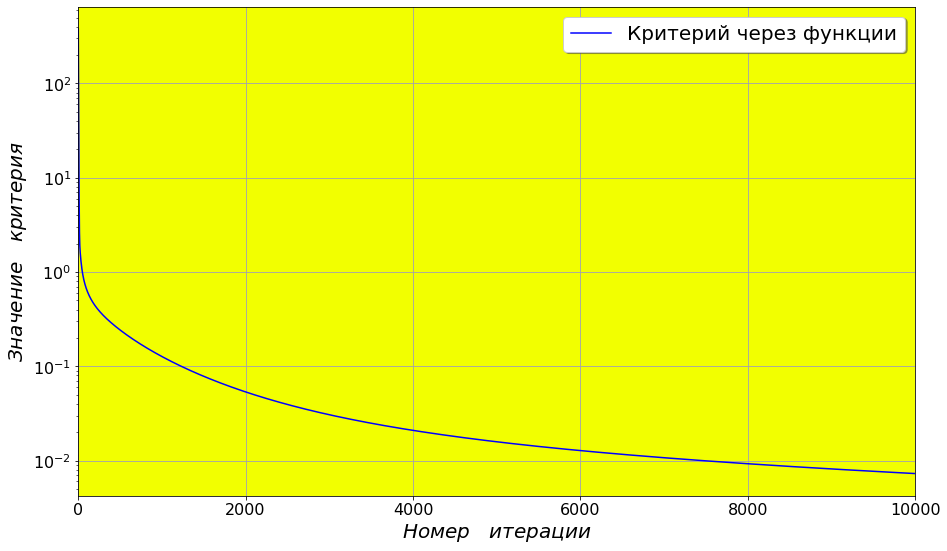

In [8]:
X = np.array([])
for i in range (1, 10001):
    X = np.append(X, i)
Y1 = np.array([])
for i in range (0, 10000):
    Y1 = np.append(Y1, gradient(X_train, y_train, res1[i]).dot(gradient(X_train, y_train, res1[i])))
Y2 = np.array([])
for i in range (0, 10000):
    Y2 = np.append(Y2, func(X_train, y_train, res1[i]) - func(X_train, y_train, omega_true))

    
fig, ax1 = plt.subplots(figsize = (15, 9))

ax1.grid(color = (0.65, 0.65, 0.65), linewidth = 0.9)
ax1.set_facecolor((0.95, 1, 0))

plt.xlim(0, 10000)

ax1.errorbar(X, Y1, fmt = '-',
            color = 'k', ms = 4, label = 'Градиентный критерий')

ax1.semilogy()

ax1.set_xlabel('$Номер\quad итерации$', fontsize = '20')
ax1.set_ylabel('$Значение\quad критерия$', fontsize = '20')

plt.rc('font', size=16) 

leg = ax1.legend(fontsize = '20', shadow = True)

fig, ax = plt.subplots(figsize = (15, 9))

ax.grid(color = (0.65, 0.65, 0.65), linewidth = 0.9)
ax.set_facecolor((0.95, 1, 0))

plt.xlim(0, 10000)

ax.errorbar(X, Y2, fmt = '-',
            color = 'b', ms = 4, label = 'Критерий через функции')

ax.semilogy()

ax.set_xlabel('$Номер\quad итерации$', fontsize = '20')
ax.set_ylabel('$Значение\quad критерия$', fontsize = '20')

plt.rc('font', size=16) 

leg = ax.legend(fontsize = '20', shadow = True)

#### Критерий с известным решением x^* оказался несостоятельным к данной задаче. Зато градиентный критерий и критерий через функции показал, что наш метод сходится. Дальше мы будем проверять сходимость сравнивая градиент с нулем.

__(д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

In [9]:
def precisions(iteration, res):
    y_set = np.array(list(set(y)))
    number_of_true_precisions = 0
    for i in range (n_test): 
        k = 0
        minim = 1000
        for j in range (len(y_set)):
            if (abs(res[iteration].dot(X_test[i]) - y_set[j]) < minim):
                minim = abs(res[iteration].dot(X_test[i]) - y_set[j])
                k = j
        if (y_set[k] == y_test[i]):
            number_of_true_precisions = number_of_true_precisions + 1   
    procent_of_precisions = number_of_true_precisions/y_test.shape[0]
    return procent_of_precisions, number_of_true_precisions

print(precisions(9999, res1))

(0.9938461538461538, 1615)


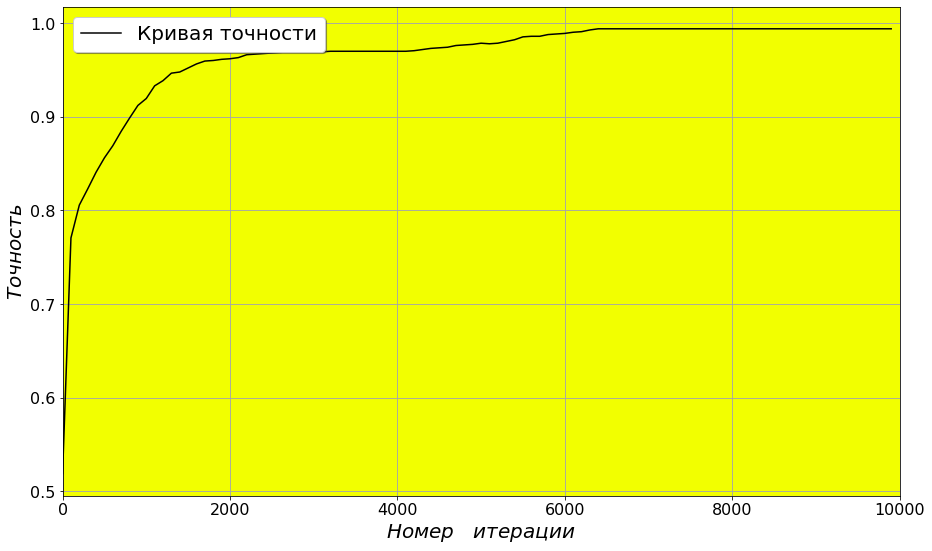

In [10]:
X_pre = np.array([])
for i in range (100):
    X_pre = np.append(X_pre, i*100)
    
Y_pre = np.array([])
for i in range (100):
    Y_pre = np.append(Y_pre, precisions(i*100, res1)[0])
    
fig, ax1 = plt.subplots(figsize = (15, 9))

ax1.grid(color = (0.65, 0.65, 0.65), linewidth = 0.9)
ax1.set_facecolor((0.95, 1, 0))

plt.xlim(0, 10000)

ax1.errorbar(X_pre, Y_pre, fmt = '-',
            color = 'k', ms = 4, label = 'Кривая точности')

#ax1.semilogy()

ax1.set_xlabel('$Номер\quad итерации$', fontsize = '20')
ax1.set_ylabel('$Точность$', fontsize = '20')

plt.rc('font', size=16) 

leg = ax1.legend(fontsize = '20', shadow = True)

#### На обучающей части датасета мы подобрали веса $\omega$ таким образом, чтобы на них мы получалали с хорошей точностью значения $y_{train}$. Вектор $y$ принимает два значения, например является поданная на вход картинка грибом или нет. Тогда на тестовой части датасета с найденным весами мы можем проверить будет ли модель давать значения $y_{test}$. Значения модели получаются не целыми (1 или 2). Будем округлять их стандартным алгебраическим округлением и сверять с $y$ для каждой картинки. Количество совпавших значений будет точностью модели. Видим, что мы получили практически точное совпадение значений, и модель ошиблась в предсказании всего около 10 раз.

__(e)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $\lambda$. Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

In [11]:
def proc(a, i, lambd):
    return(i-d)*abs(a[i])+sum(abs(a[k]) for k in range(i+1, d+1)) - lambd

def projection(a, lambd):
    a_sort = np.sort(abs(a))
    a_sort = np.insert(a_sort, 0, 0)
    g_diff = []
    k_sign = 0
    for i in range(d_train+1):
        g_diff.append(proc(a_sort, i, lambd))
        if(g_diff[i] >= 0):
            k_sign = i
    mu = (sum(abs(a_sort[i]) for i in range(k_sign+1, d_train+1)) - lambd)/(d_train-k_sign)
    
    S = np.sum(abs(a))
    if (S > lambd):
        for j in range (d):
            if (a[j] > mu):
                a[j] = a[j] - mu
            elif (a[j] < - mu):
                a[j] = a[j] + mu
            else:
                a[j] = 0
    return a
    

def modified_gradient_descent(X, y, start, learning_rate, amount_of_iterations, lambd):
    omega = start
    omega = omega.reshape(1, d_train)
    for i in range (1, amount_of_iterations):
        omega = np.vstack([omega, projection(omega[i-1] - learning_rate*gradient(X, y, omega[i-1]), lambd)])
    return omega
#res2 = modified_gradient_descent(X_train, y_train, np.ones(d_train), 0.01, 10000, 1)
#res3 = modified_gradient_descent(X_train, y_train, np.ones(d_train), 0.01, 10000, 10)
#res4 = modified_gradient_descent(X_train, y_train, np.ones(d_train), 0.01, 10000, 100)
#res5 = modified_gradient_descent(X_train, y_train, np.ones(d_train), 0.01, 10000, 150)

In [12]:
#print("Критерий для lambda = 1", gradient(X_train, y_train, res2[9999]).dot(gradient(X_train, y_train, res2[9999])))
#print("Критерий для lambda = 10", gradient(X_train, y_train, res3[9999]).dot(gradient(X_train, y_train, res3[9999])))
#print("Критерий для lambda = 100", gradient(X_train, y_train, res4[9999]).dot(gradient(X_train, y_train, res4[9999])))
#print("Критерий для lambda = 150", gradient(X_train, y_train, res5[9999]).dot(gradient(X_train, y_train, res5[9999])))
#print("Точность для lambda = 1", precisions(9999, res2))
#print("Точность для lambda = 10", precisions(9999, res3))
#print("Точность для lambda = 100", precisions(9999, res4))
#print("Точность для lambda = 150", precisions(9999, res5))

In [13]:
res6 = modified_gradient_descent(X_train, y_train, np.ones(d_train), 0.01, 10000, 15)
print("Критерий для lambda = 15:", gradient(X_train, y_train, res6[9999]).dot(gradient(X_train, y_train, res6[9999])))
print("Точность для lambda = 15:", precisions(9999, res6))

Критерий для lambda = 15: 1.805943856277039e-05
Точность для lambda = 15: (0.9993846153846154, 1624)


#### С помощью алгоритма, описанного в пункте 1а, сделали задачу обучения на $l_1$- шаре. Видим, что при $\lambda  = 15$ мы получили наименьшую ошибку и лучшую точность модели (всего 1 неверное предсказание). Заметим, что при маленьких $\lambda$ шар слишком мал, и так как результат - точка из этого шара, то мы не находили минимального решения. Напротив, когда $\lambda$ слишком большая, почти все точки лежат внутри этого шара и метод эквивалентен обычному градиентному спуску, в итоге ошибка и точность совпали с пунктами г, д. При оптимальном значении $\lambda = 15$ мы смогли сильно улучшить предыдущие показатели и сократили количество неверных предсказаний до 1.

__Бонусные пункт__

__(ж)__ Снова рассмотрим задачу обучения без ограничений, но добавим к ней регуляризатор 1) $\lambda \| x \|_1$ c $\lambda  > 0$, 2) $\lambda \| x \|_2$ c $\lambda  > 0$. Сможем ли для новой задачи с регуляризатором использовать честный градиентный спуск без модификаций? Почему? Предложите свои идеи, как модифицировать градиентный спуск для новой задачи. Проведите для него эксперименты из пунктов г) и д).  Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Сравните результаты с пунктом e).

Можем пользоваться обычным градиентным спуском, но добавление регулязатора портит функцию, то есть меняет константу липшевости. Поэтому лучше всего воспользоваться проксимальным методом, то есть на каждой итерации искать $\text{prox}$, так как это обходится нам довольно дёшево, а метод сходится также как градиентный.

#### Найдем выражение для итерации в аналитическом виде:

$x^{k + 1} = \text{prox}_{\lambda r}(x^k - \gamma\nabla f(x^{k})) = \text{argmin}_{x \in \mathbb{R}^d}(\frac{1}{2} ||x^k - \gamma\nabla f(x^{k}) - x||^2 + \lambda r)$

$\nabla(\frac{1}{2} ||x^k - \gamma\nabla f(x^{k}) - x||^2 + \lambda r(x)) = 0$

$x^{k + 1} = x^{k} - \gamma \nabla f(x^k) - \lambda \nabla r(x^{k + 1})$

Тогда для $l_1$ нормы:

$x^{k + 1}_i = x^{k}_i - \gamma\nabla f(x^k)_i - \lambda$, если $x^{k}_i - \gamma\nabla f(x^k)_i > \lambda$

$x^{k + 1}_i = 0$, если $-\lambda \leq x^{k}_i - \gamma\nabla f(x^k)_i \leq \lambda$

$x^{k + 1}_i = x^{k}_i - \gamma\nabla f(x^k)_i + \lambda$, если $x^{k}_i - \gamma\nabla f(x^k)_i < -\lambda$

Для $l_2$ нормы:

$x^{k + 1} = \frac{x^{k} - \gamma \nabla f(x^k)}{1 + 2\lambda}$

### $l_1$ норма
Увидим далее, что оптимально: $\lambda = 0.0005$. При больших $\lambda$ показатели хуже из-за ухудшающейся точности, а при меньших из-за недостаточного количества зануления компонент в векторах.

In [14]:
def func(X, y, omega):
    return 1/n_train*(X.dot(omega) - y).dot(X.dot(omega) - y)
def gradient(X, y, omega):
    return (2/n_train*X.T).dot(X.dot(omega) - y)

In [15]:
y_train = y_train*2 - 3
y_test = y_test*2 - 3

In [16]:
def precisions_new1(iteration, res):
    number_of_true_precisions = 0
    for i in range (n_test): 
        if (res[iteration].dot(X_test[i]) >= 0):
            k = 1
        else:
            k = -1
        if (k == y_test[i]):
            number_of_true_precisions = number_of_true_precisions + 1   
    procent_of_precisions = number_of_true_precisions/y_test.shape[0]
    return procent_of_precisions, number_of_true_precisions

In [17]:
def prox1(omega, lr, grad, lamb, d):
    omega_fin = np.array([])
    for i in range (d):
        if ((omega[i] - lr*grad[i]) > lamb):
            omega_fin = np.append(omega_fin, omega[i] - lr*grad[i] - lamb)
        if ((omega[i] - lr*grad[i]) < -lamb):
            omega_fin = np.append(omega_fin, omega[i] - lr*grad[i] + lamb)
        if (((omega[i] - lr*grad[i]) >= -lamb) and ((omega[i] - lr*grad[i]) <= lamb)):
            omega_fin = np.append(omega_fin, 0)
    return omega_fin

def prox_gradient_descent(X, y, start, lr, amount_of_iterations, lamb, norm, d):
    omega = start
    omega = omega.reshape(1, d)
    begin_time = time.time()
    timeprog = []
    grad_array = []
    for i in range (1, amount_of_iterations):
        grad = gradient(X, y, omega[i-1])
        grad_array.append(grad)
        if (norm == 1):
            omega_k = prox1(omega[i-1], lr, grad, lamb, d)
        if (norm == 2):
            omega_k = prox2(omega[i-1], lr, grad, lamb)
        omega = np.vstack([omega, omega_k])
        timeprog.append(time.time() - begin_time)
    return omega, grad_array, timeprog

In [18]:
res_prox1, grad_prox1, time_prox1 = prox_gradient_descent(X_train, y_train, np.ones(d_train), 0.01, 2000, 0.0005, 1, d)

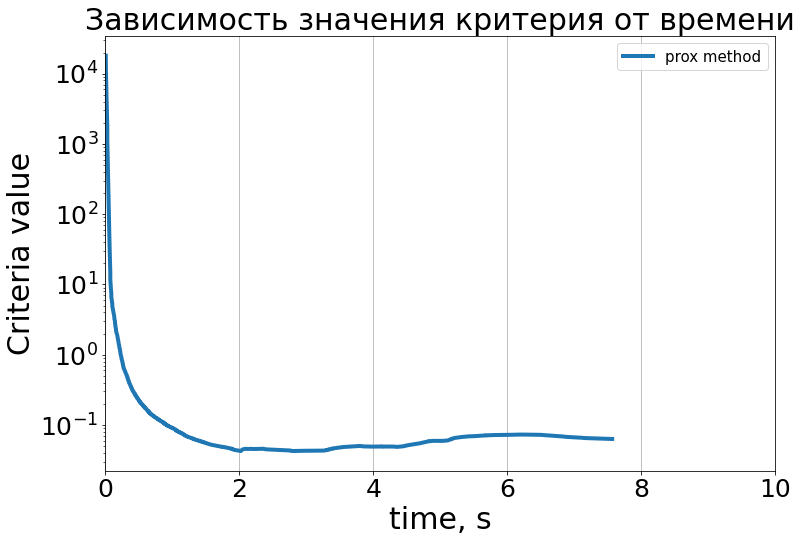

In [19]:
X1 = np.array([])
for i in range (0, 1998):
    X1 = np.append(X1, time_prox1[i])
Y1 = np.array([])
for i in range (0, 1998):
    Y1 = np.append(Y1, grad_prox1[i].dot(grad_prox1[i]))
    
plt.figure(figsize=(12, 8))

plt.semilogy(X1, Y1, linewidth=4, label = 'prox method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 10)

plt.grid(axis = 'x')

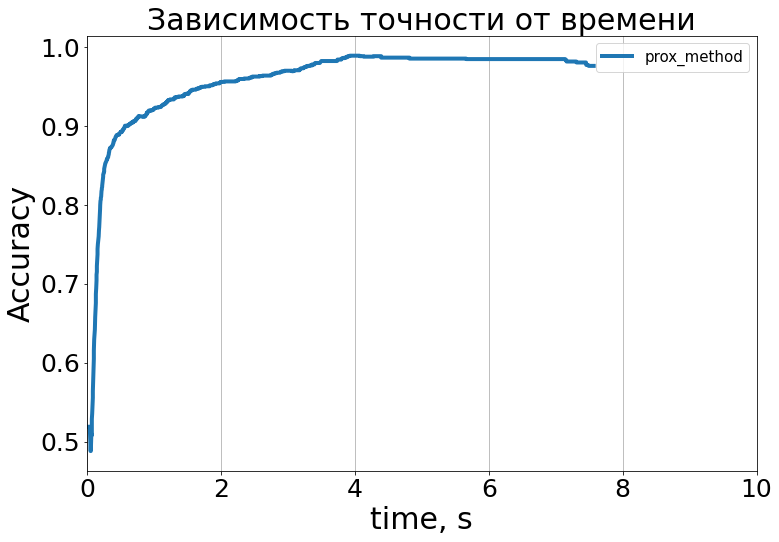

In [20]:
X1 = np.array([])
for i in range (0, 1998):
    X1 = np.append(X1, time_prox1[i])
Y1 = np.array([])
for i in range (0, 1998):
    Y1 = np.append(Y1, precisions_new1(i, res_prox1)[0])
    
plt.figure(figsize=(12, 8))

plt.plot(X1, Y1, linewidth=4, label = 'prox_method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Accuracy", fontsize=30)
plt.title(r"Зависимость точности от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 10)

plt.grid(axis = 'x')

Видим, что модель в ходе обучения достигает максимальной точности, а после ее точность немного падает. Найдем максимальную точность

In [21]:
print(max(precisions_new1(i, res_prox1) for i in range (1, 1999)))

(0.9889230769230769, 1607)


### $l_2$ норма
Далее увидим, что, как и в случае с $l_1$ нормой оптимально: $\lambda = 0.0005$

In [22]:
def prox2(omega, lr, grad, lamb):
    return (omega - lr*grad)/(1 + 2*lamb)

In [23]:
res_prox2, grad_prox2, time_prox2 = prox_gradient_descent(X_train, y_train, np.ones(d_train), 0.01, 2000, 0.0005, 2, d)

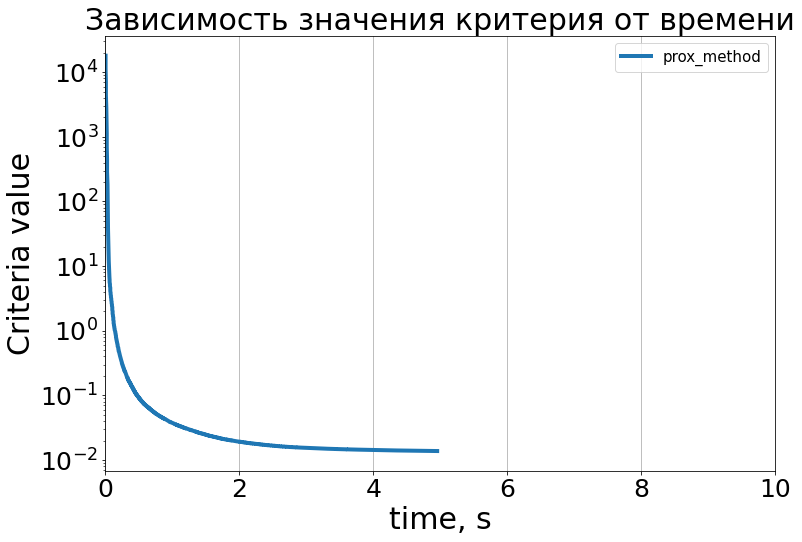

In [24]:
X1 = np.array([])
for i in range (0, 1998):
    X1 = np.append(X1, time_prox2[i])
Y1 = np.array([])
for i in range (0, 1998):
    Y1 = np.append(Y1, grad_prox2[i].dot(grad_prox2[i]))
    
plt.figure(figsize=(12, 8))

plt.semilogy(X1, Y1, linewidth=4, label = 'prox_method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 10)

plt.grid(axis = 'x')

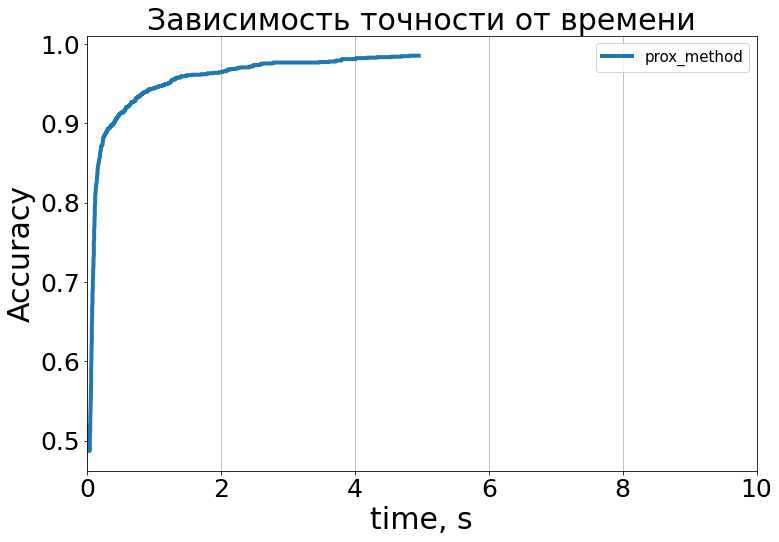

In [25]:
X1 = np.array([])
for i in range (0, 1998):
    X1 = np.append(X1, time_prox2[i])
Y1 = np.array([])
for i in range (0, 1998):
    Y1 = np.append(Y1, precisions_new1(i, res_prox2)[0])
    
plt.figure(figsize=(12, 8))

plt.plot(X1, Y1, linewidth=4, label = 'prox_method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Accuracy", fontsize=30)
plt.title(r"Зависимость точности от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 10)

plt.grid(axis = 'x')

Итоговая точность:

In [26]:
print(precisions_new1(1999, res_prox2))

(0.9852307692307692, 1601)


__(з)__ Воспользуемся для нашей задачи методом [PCA](https://ru.wikipedia.org/wiki/Метод_главных_компонент). Прочитайте про него подробнее и опишите основную идею.

Так как с матрицами меньшего размера быстрее работать, то мы хотим приблизить нашу матрицу, матрицей меньшего ранга, причём хотим сделать это оптимально. С помощью сингулярного разложения (которое минимизирует норму $||A - A_k||$) мы находим n максимальных сингулярных чисел и выделяем главные компоненты, то есть раскладываем по собственным векторам сингулярных чисел нашу матрицу. В итоге получаем приближенную матрицу размера с n компонентами.

Следующий код запускает PCA для нашего датасета. Убедитесь, что понимаете происходящие.

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(X_train)  #эта строчка будет работать только если есть матрица X_train
print (pca.explained_variance_ratio_.cumsum())

[0.17105948 0.30230759 0.39600739 0.45841994 0.49866259 0.53641085
 0.56906106 0.59689847 0.6237895  0.64579711 0.66658484 0.68576862
 0.70460266 0.72208906 0.73813622 0.75365205 0.7687872  0.78338831
 0.79712674 0.80930772]


Какое значение n_components разумно поставить? Для новой матрицы X_train повторите пункт ж). Измерьте время работы процесса обучения. Постройте график точности решения на тестовой выборке от времени работы для честного X_train и полученного с помощью PCA.

В предыдущем пункте мы получили порядка 20 "плохих" признаков, поэтому для достижения хорошей точности возьмем число главных компонент, равное 20.

In [28]:
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

d_new = 20

### $l_1$ норма

In [29]:
res_pca1, grad_pca1, time_pca1 = prox_gradient_descent(X_train_new, y_train, np.ones(d_new), 0.01, 2000, 0.0005, 1, d_new)

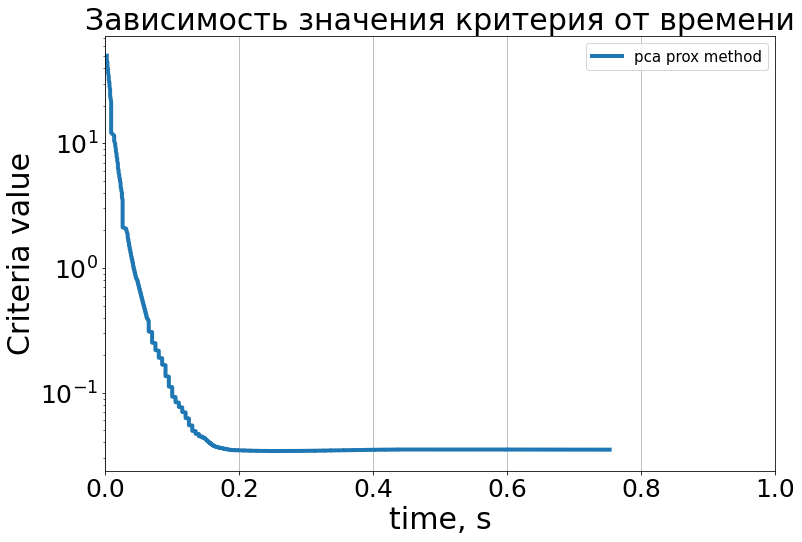

In [40]:
X1 = np.array([])
for i in range (0, 1998):
    X1 = np.append(X1, time_pca1[i])
Y1 = np.array([])
for i in range (0, 1998):
    Y1 = np.append(Y1, grad_pca1[i].dot(grad_pca1[i]))
    
plt.figure(figsize=(12, 8))

plt.semilogy(X1, Y1, linewidth=4, label = 'pca prox method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1)

plt.grid(axis = 'x')

In [31]:
def precisions_new2(iteration, res):
    number_of_true_precisions = 0
    for i in range (n_test): 
        if (res[iteration].dot(X_test_new[i]) >= 0):
            k = 1
        else:
            k = -1
        if (k == y_test[i]):
            number_of_true_precisions = number_of_true_precisions + 1   
    procent_of_precisions = number_of_true_precisions/y_test.shape[0]
    return procent_of_precisions, number_of_true_precisions

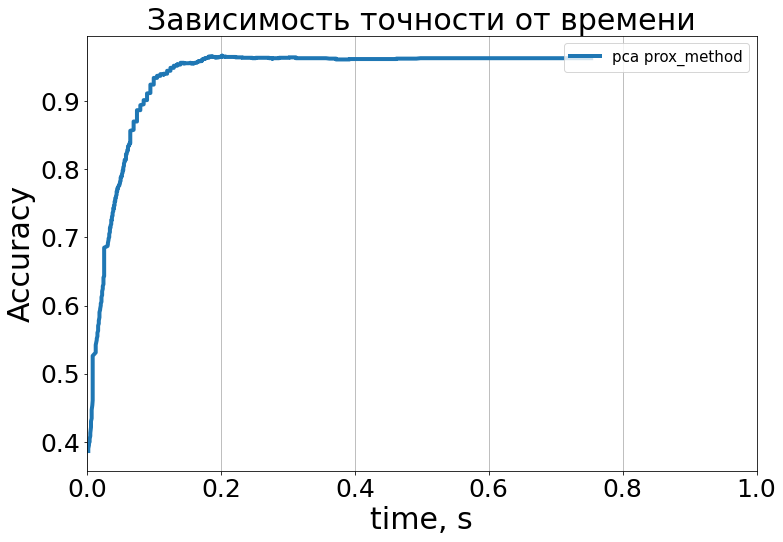

In [41]:
X1 = np.array([])
for i in range (0, 1998):
    X1 = np.append(X1, time_pca1[i])
Y1 = np.array([])
for i in range (0, 1998):
    Y1 = np.append(Y1, precisions_new2(i, res_pca1)[0])
    
plt.figure(figsize=(12, 8))

plt.plot(X1, Y1, linewidth=4, label = 'pca prox_method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Accuracy", fontsize=30)
plt.title(r"Зависимость точности от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1)

plt.grid(axis = 'x')

In [33]:
print(max(precisions_new2(i, res_pca1) for i in range (1, 1999)))

(0.9667692307692307, 1571)


### $l_2$ норма

In [34]:
res_pca2, grad_pca2, time_pca2 = prox_gradient_descent(X_train_new, y_train, np.ones(d_new), 0.01, 2000, 0.0005, 2, d_new)

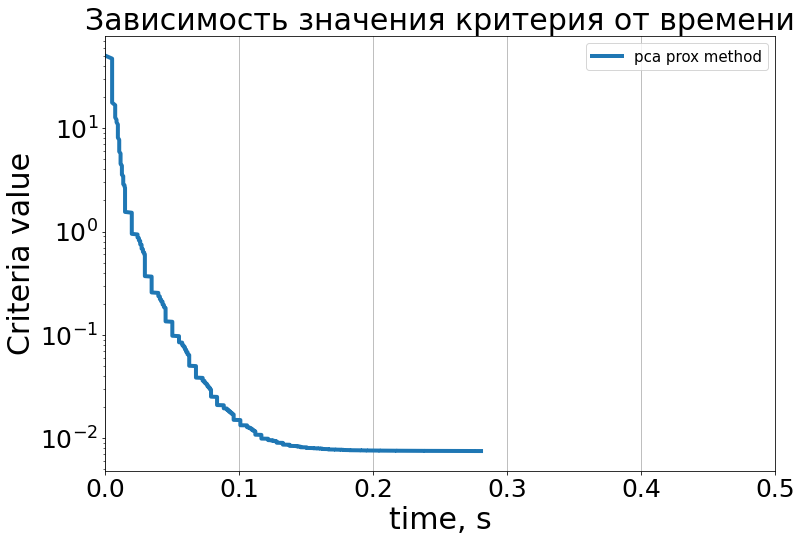

In [43]:
X1 = np.array([])
for i in range (0, 1998):
    X1 = np.append(X1, time_pca2[i])
Y1 = np.array([])
for i in range (0, 1998):
    Y1 = np.append(Y1, grad_pca2[i].dot(grad_pca2[i]))
    
plt.figure(figsize=(12, 8))

plt.semilogy(X1, Y1, linewidth=4, label = 'pca prox method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 0.5)

plt.grid(axis = 'x')

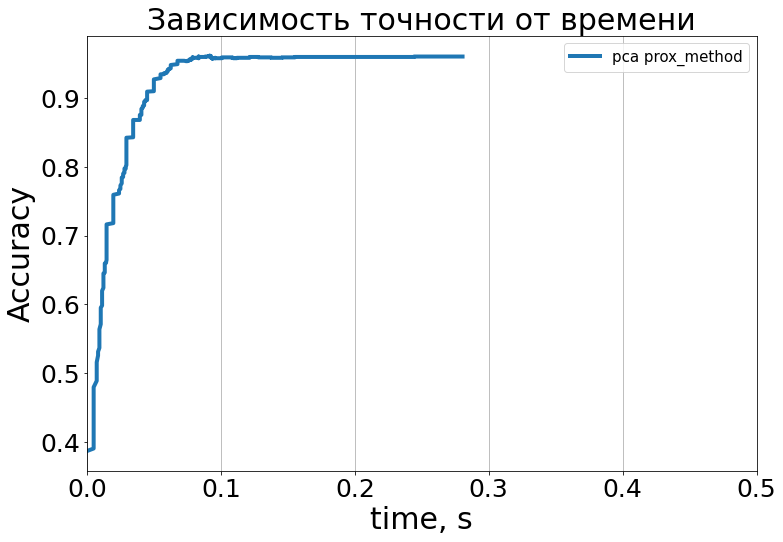

In [44]:
X1 = np.array([])
for i in range (0, 1998):
    X1 = np.append(X1, time_pca2[i])
Y1 = np.array([])
for i in range (0, 1998):
    Y1 = np.append(Y1, precisions_new2(i, res_pca2)[0])
    
plt.figure(figsize=(12, 8))

plt.plot(X1, Y1, linewidth=4, label = 'pca prox_method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Accuracy", fontsize=30)
plt.title(r"Зависимость точности от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 0.5)

plt.grid(axis = 'x')

In [37]:
print(max(precisions_new2(i, res_pca2) for i in range (1, 1999)))

(0.9618461538461538, 1563)


#### Сравним PCA и обычный проксимальный метод

#### $l_1$ норма

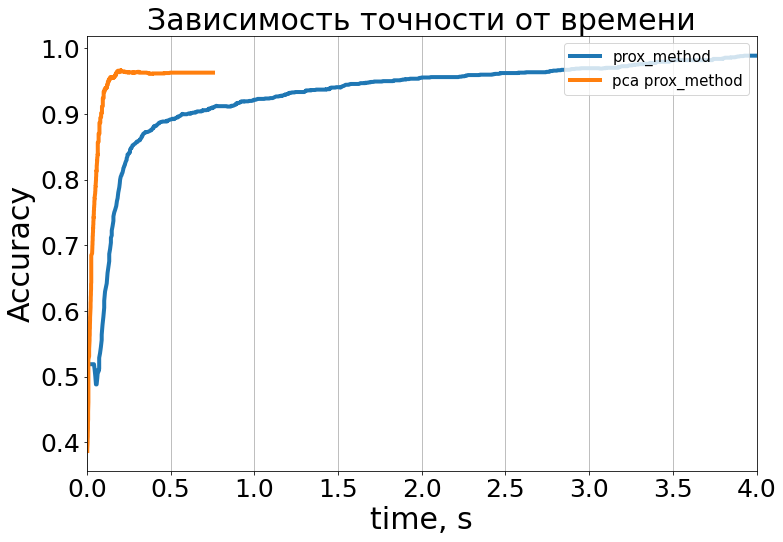

In [45]:
X1 = np.array([])
for i in range (0, 1998):
    X1 = np.append(X1, time_prox1[i])
Y1 = np.array([])
for i in range (0, 1998):
    Y1 = np.append(Y1, precisions_new1(i, res_prox1)[0])
X2 = np.array([])
for i in range (0, 1998):
    X2 = np.append(X2, time_pca1[i])
Y2 = np.array([])
for i in range (0, 1998):
    Y2 = np.append(Y2, precisions_new2(i, res_pca1)[0])

    
plt.figure(figsize=(12, 8))

plt.plot(X1, Y1, linewidth=4, label = 'prox_method')
plt.plot(X2, Y2, linewidth=4, label = 'pca prox_method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Accuracy", fontsize=30)
plt.title(r"Зависимость точности от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 4)

plt.grid(axis = 'x')

### $l_2$ норма

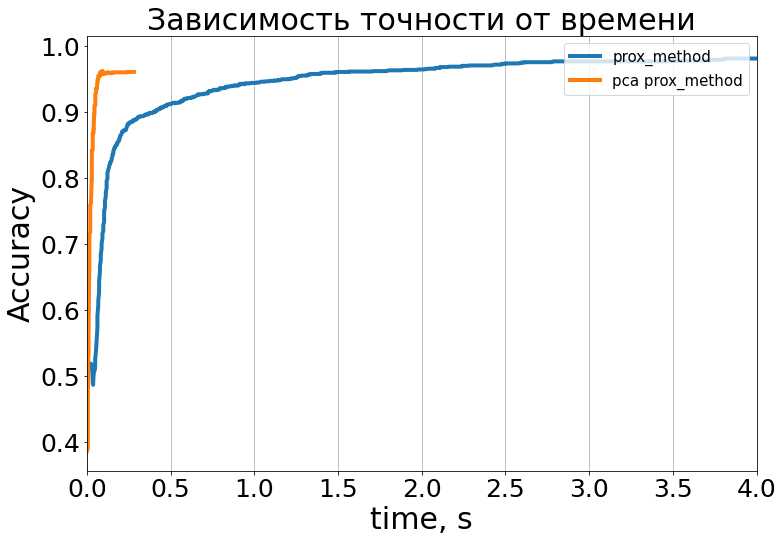

In [46]:
X1 = np.array([])
for i in range (0, 1998):
    X1 = np.append(X1, time_prox2[i])
Y1 = np.array([])
for i in range (0, 1998):
    Y1 = np.append(Y1, precisions_new1(i, res_prox2)[0])
X2 = np.array([])
for i in range (0, 1998):
    X2 = np.append(X2, time_pca2[i])
Y2 = np.array([])
for i in range (0, 1998):
    Y2 = np.append(Y2, precisions_new2(i, res_pca2)[0])

    
plt.figure(figsize=(12, 8))

plt.plot(X1, Y1, linewidth=4, label = 'prox_method')
plt.plot(X2, Y2, linewidth=4, label = 'pca prox_method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Accuracy", fontsize=30)
plt.title(r"Зависимость точности от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 4)

plt.grid(axis = 'x')

#### Вывод:
Видим, что с методом PCA проксимальный метод достигает худшей точности (порядка 2%), но делает это существенно быстрее.